In [4]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

In [9]:
E=read.delim("analysis/significantly_enriched_terms.FDGENEA.Benjamini-Hochberg.txt",sep="\t")
E=droplevels(subset(E,ontology != "TO" & group=="subnetworks"))

In [37]:
head(E)

,group,set,method,cutoff,ontology,ID,Pop.total,Pop.term,Study.total,Study.term,Pop.family,Study.family,nparents,is.trivial,p,p.adjusted,p.min,depth,ic,partition,level3,name,loci
15848,subnetworks,I,Benjamini-Hochberg,0.1,GO,GO:0000160,27502,317,2446,63,950,127,1,false,3.466467e-05,0.002393370,7.055087e-262,15,8.057631,biological_process,biological regulation,phosphorelay signal transduction system,"Pp3c10_20000.mRNA,Pp3c12_17730.mRNA,Pp3c5_810.mRNA,Pp3c10_20210.mRNA,Pp3c1_2880.mRNA,Pp3c20_13520.mRNA,Pp3c4_2680.mRNA,Pp3c20_3770.mRNA,Pp3c9_18950.mRNA,Pp3c11_6330.mRNA,Pp3c16_13280.mRNA,Pp3c20_17580.mRNA,Pp3c9_4870.mRNA,Pp3c1_2740.mRNA,Pp3c1_5010.mRNA,Pp3c16_18760.mRNA,Pp3c8_8150.mRNA,Pp3c1_32730.mRNA,Pp3c4_2530.mRNA,Pp3c11_10660.mRNA,Pp3c6_19350.mRNA,Pp3c9_4590.mRNA,Pp3c5_23340.mRNA,Pp3c25_12650.mRNA,Pp3c15_3620.mRNA,Pp3c2_1280.mRNA,Pp3c4_2590.mRNA,Pp3c11_23290.mRNA,Pp3c13_4270.mRNA,Pp3c6_28370.mRNA,Pp3c20_19070.mRNA,Pp3c3_31500.mRNA,Pp3c3_6830.mRNA,Pp3c25_7430.mRNA,Pp3c3_36750.mRNA,Pp3c6_16660.mRNA,Pp3c7_2300.mRNA,Pp3c16_300.mRNA,Pp3c1_2980.mRNA,Pp3c3_13510.mRNA,Pp3c6_28290.mRNA,Pp3c16_13260.mRNA,Pp3c7_7640.mRNA,Pp3c5_820.mRNA,Pp3c1_2770.mRNA,Pp3c5_9120.mRNA,Pp3c2_21330.mRNA,Pp3c9_25160.mRNA,Pp3c5_4120.mRNA,Pp3c3_23790.mRNA,Pp3c3_25560.mRNA,Pp3s423_10.mRNA,Pp3c5_3880.mRNA,Pp3c4_2660.mRNA,Pp3c27_1350.mRNA,Pp3c8_13750.mRNA,Pp3c18_4650.mRNA,Pp3c22_1800.mRNA,Pp3c14_17150.mRNA,Pp3c2_36690.mRNA,Pp3c19_6370.mRNA,Pp3c27_6030.mRNA,Pp3c1_32850.mRNA"
15849,subnetworks,I,Benjamini-Hochberg,0.1,GO,GO:0000707,27502,6,2446,3,136,5,2,false,4.713542e-04,0.019871961,1.272501e-10,45,8.973922,biological_process,cellular component organization or biogenesis,meiotic DNA recombinase assembly,"Pp3c5_12400.mRNA,Pp3c23_10930.mRNA,Pp3c9_23740.mRNA"
15850,subnetworks,I,Benjamini-Hochberg,0.1,GO,GO:0000723,27502,102,2446,18,1088,84,3,false,3.811116e-04,0.017395377,2.344174e-146,25,6.740329,biological_process,organic substance metabolic process,telomere maintenance,"Pp3c4_2680.mRNA,Pp3c20_3770.mRNA,Pp3c16_13280.mRNA,Pp3c1_5010.mRNA,Pp3c11_10660.mRNA,Pp3c6_19350.mRNA,Pp3c9_4590.mRNA,Pp3c15_3620.mRNA,Pp3c13_4270.mRNA,Pp3c2_20860.mRNA,Pp3c3_31500.mRNA,Pp3c3_6830.mRNA,Pp3c6_16660.mRNA,Pp3c6_28290.mRNA,Pp3c4_2660.mRNA,Pp3c2_36690.mRNA,Pp3c14_26730.mRNA,Pp3c27_6030.mRNA"
15851,subnetworks,I,Benjamini-Hochberg,0.1,GO,GO:0000730,27502,7,2446,3,209,10,3,false,2.524816e-03,0.063979908,3.202604e-13,37,8.686240,biological_process,cellular component organization or biogenesis,DNA recombinase assembly,"Pp3c5_12400.mRNA,Pp3c23_10930.mRNA,Pp3c9_23740.mRNA"
15852,subnetworks,I,Benjamini-Hochberg,0.1,GO,GO:0001505,27502,29,2446,11,2313,251,1,false,1.150695e-04,0.006449308,2.897291e-67,3,5.600895,biological_process,regulation of biological quality,regulation of neurotransmitter levels,"Pp3c6_1770.mRNA,Pp3c3_5720.mRNA,Pp3c12_6540.mRNA,Pp3c13_2400.mRNA,Pp3c13_2420.mRNA,Pp3c5_10970.mRNA,Pp3c5_11640.mRNA,Pp3c12_6548.mRNA,Pp3c16_23390.mRNA,Pp3c13_3410.mRNA,Pp3c9_25180.mRNA"
15853,subnetworks,I,Benjamini-Hochberg,0.1,GO,GO:0002020,27502,57,2446,12,633,47,1,false,4.032179e-04,0.017786388,1.139846e-82,4,9.667069,molecular_function,protein binding,protease binding,"Pp3c3_25910.mRNA,Pp3c23_15640.mRNA,Pp3c5_3340.mRNA,Pp3c14_11830.mRNA,Pp3c2_28070.mRNA,Pp3c16_13851.mRNA,Pp3c20_23820.mRNA,Pp3c7_27100.mRNA,Pp3c20_11540.mRNA,Pp3c15_799.mRNA,Pp3c6_6330.mRNA,Pp3c1_25070.mRNA"


In [31]:
library(ggplot2)
library(UpSetR)
library(reshape2)

In [33]:
X=table(E$set,paste(E$ontology,E$partition))
X
X=melt(X)
names(X)=c("subnetwork","partition","enriched_terms")

head(X)

      
       GO biological_process GO cellular_component GO molecular_function
  I                      185                    19                    23
  II                      74                    13                    17
  III                    129                    16                    21
  IV                      46                     7                    10
  IX                     339                    95                    98
  V                      390                    66                    75
  VI                      22                     7                     6
  VII                    180                    33                    40
  VIII                   280                    79                    65
  X                      507                    60                   105
  XI                      68                    18                    19
      
       PO plant anatomical entity PO plant structure development stage
  I                            57      

subnetwork,partition,enriched_terms
I,GO biological_process,185
II,GO biological_process,74
III,GO biological_process,129
IV,GO biological_process,46
IX,GO biological_process,339
V,GO biological_process,390


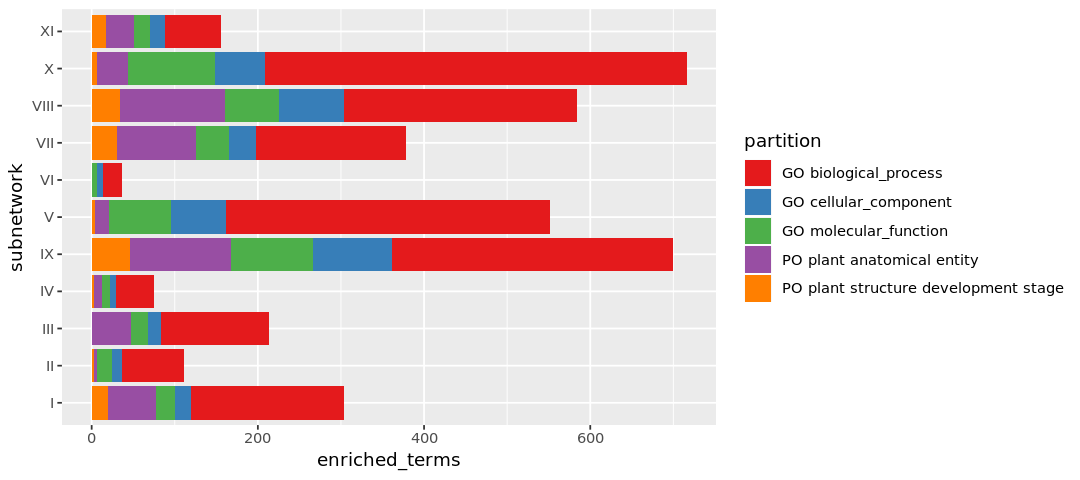

In [38]:
options(repr.plot.width=9, repr.plot.height=4)
g=ggplot(X,aes(x=subnetwork,y=enriched_terms,fill=partition)) + geom_bar(stat="identity",position="stack") +scale_fill_brewer(palette="Set1") + coord_flip()
g
ggsave(g,file="total_raw_numbers.fdr0.1.enriched_terms.subnetworks.pdf",width=9,height=4)

List of 11
 $ I   : chr [1:57] "PO:0000001" "PO:0000004" "PO:0000005" "PO:0000006" ...
 $ II  : chr [1:4] "PO:0000262" "PO:0006036" "PO:0025164" "PO:0030086"
 $ III : chr [1:46] "PO:0000002" "PO:0000017" "PO:0000021" "PO:0000032" ...
 $ IV  : chr [1:9] "PO:0000017" "PO:0008028" "PO:0009025" "PO:0009026" ...
 $ V   : chr [1:17] "PO:0000004" "PO:0000006" "PO:0000263" "PO:0003011" ...
 $ VI  : chr(0) 
 $ VII : chr [1:95] "PO:0000009" "PO:0000015" "PO:0000017" "PO:0000018" ...
 $ VIII: chr [1:126] "PO:0000004" "PO:0000005" "PO:0000006" "PO:0000013" ...
 $ IX  : chr [1:122] "PO:0000004" "PO:0000005" "PO:0000015" "PO:0000017" ...
 $ X   : chr [1:38] "PO:0000016" "PO:0000025" "PO:0000026" "PO:0000115" ...
 $ XI  : chr [1:34] "PO:0000004" "PO:0000019" "PO:0000055" "PO:0000225" ...


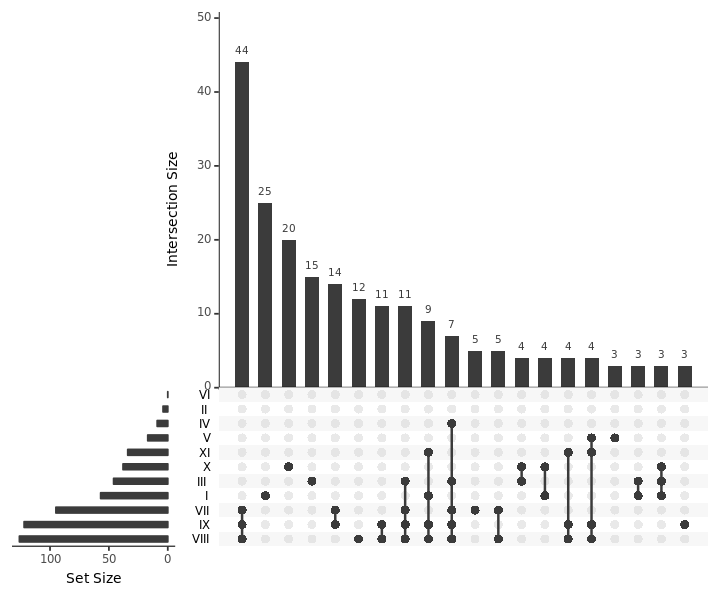

In [27]:
O="PO"
p="plant anatomical entity"
n=as.character(as.roman(1:11))
pp=lapply(n,function(i){
    as.character(E[E$ontology==O & E$partition==p & E$set==i,"ID"])
})
names(pp)=n
str(pp)

options(repr.plot.width=6, repr.plot.height=5)
u=upset(fromList(pp), order.by = "freq",keep.order = TRUE,nsets=length(names(pp)),nintersects=20,mb.ratio = c(0.65, 0.35))
u

List of 11
 $ I   : chr [1:185] "GO:0000160" "GO:0000707" "GO:0000723" "GO:0000730" ...
 $ II  : chr [1:74] "GO:0006026" "GO:0006301" "GO:0006351" "GO:0006355" ...
 $ III : chr [1:129] "GO:0000238" "GO:0000302" "GO:0006351" "GO:0006355" ...
 $ IV  : chr [1:46] "GO:0003006" "GO:0006313" "GO:0006325" "GO:0006351" ...
 $ V   : chr [1:390] "GO:0000003" "GO:0000075" "GO:0000162" "GO:0000226" ...
 $ VI  : chr [1:22] "GO:0000302" "GO:0006351" "GO:0006457" "GO:0006950" ...
 $ VII : chr [1:180] "GO:0000003" "GO:0000122" "GO:0000209" "GO:0000918" ...
 $ VIII: chr [1:280] "GO:0000096" "GO:0000165" "GO:0000271" "GO:0001101" ...
 $ IX  : chr [1:339] "GO:0000003" "GO:0000028" "GO:0000077" "GO:0000375" ...
 $ X   : chr [1:507] "GO:0000038" "GO:0000226" "GO:0000271" "GO:0000272" ...
 $ XI  : chr [1:68] "GO:0001101" "GO:0001933" "GO:0006464" "GO:0006469" ...


png 
  2

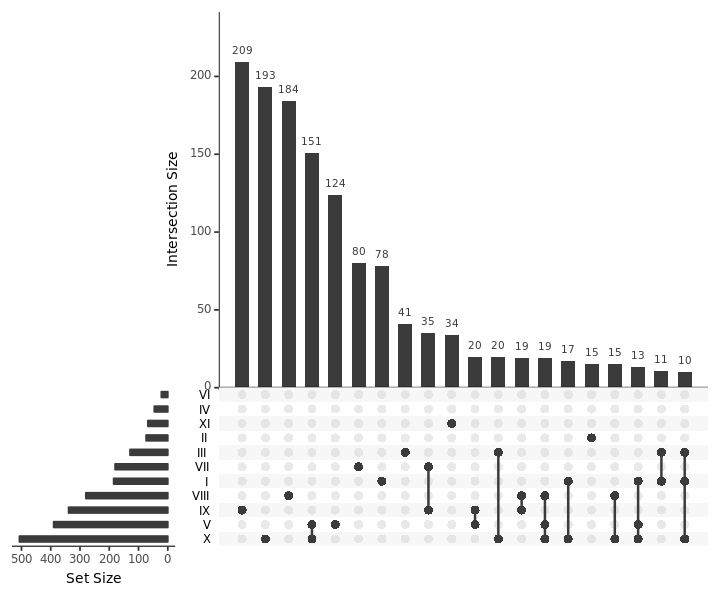

In [39]:
O="GO"
p="biological_process"
n=as.character(as.roman(1:11))
pp=lapply(n,function(i){
    as.character(E[E$ontology==O & E$partition==p & E$set==i,"ID"])
})
names(pp)=n
str(pp)

options(repr.plot.width=6, repr.plot.height=5)
u=upset(fromList(pp), order.by = "freq",keep.order = TRUE,nsets=length(names(pp)),nintersects=20,mb.ratio = c(0.65, 0.35))
u
pdf("UpsetR.total_raw.enriched_terms.subnetworks.pdf",width=6,height=5)
u
dev.off()